## Explorando los datos de la tabla de MNIST

In [84]:
import numpy as np
# Nos va a servir para funciones que contengan elementos algebraicos

import pandas as pd

df_train_total = pd.read_csv("../dataset/fashion-mnist_train.csv")
df_train_total.shape

(60000, 785)

In [85]:
df_train_total[:20] #Veamos como son las primeras 20 filas del dataframe

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


### Creo array que en la posicion i tiene asignada la prenda asociada a dicho valor

In [86]:
prendas = np.array(["Remera/Top", "Pantalon", "Pullover", "Vestido", "Saco", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"])


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [87]:
df_train = df_train_total[:5000]

In [88]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

print(X.shape, y.shape)

(5000, 784) (5000, 1)


Supuestamente es un/a Bota


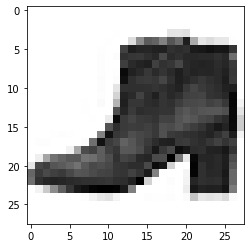

In [89]:
import matplotlib.pyplot as plt

num = 117

print(f"Supuestamente es un/a {prendas[int(y[num])]}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [90]:
df_train["label"].value_counts(normalize=True)

7    0.1034
3    0.1028
6    0.1016
0    0.1004
4    0.1002
1    0.1000
2    0.0988
9    0.0988
5    0.0978
8    0.0962
Name: label, dtype: float64

#### No, no hay la misma cantidad por cada prenda

### Conjunto de Development

In [91]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
print(limit) 

Ahora tengo 4000 instancias de entrenamiento y 1000 de validación
4000


### Uso los clasificadores de "Scikit Learn" (kNN, PCA, t-SNE, UMAP)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [62]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.8195
CPU times: user 33.2 s, sys: 10 s, total: 43.2 s
Wall time: 13.9 s


### Variacion Tamanio de la muestra

In [63]:
def muestra(cant):
    df_train_custom = df_trainBis.sample(cant)
    X_custom = df_train_custom[df_train_custom.columns[1:]].values
    y_custom = df_train_custom["label"].values
    
    return df_train_custom, X_custom, y_custom

### Estudios KFolds

#### K-Folds: kNN

In [64]:
def KFoldKNN(k, X, y):
    kfold = KFold(10)
    accuracyArr = []
    
    for i, fold in kfold.split(X):
        
        X_train = X[i]
        y_train = y[i]
        
        X_test = X[fold]
        y_test = y[fold]
        
        # Metodo kNN
        kNN = KNeighborsClassifier(k)
        
        kNN.fit(X_train, y_train)

        y_pred = kNN.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        accuracyArr.append(acc)
        
    accuracyArr = np.asarray(accuracyArr)
    mediaAccuracy = np.mean(accuracyArr)
    
    return mediaAccuracy

#### (estudio k de vecinos)

In [65]:
def estudio_k(k, X, y):
    accuracyList = []
    for i in range(1, k):
        mediaAccuracy = KFoldKNN(int(i), X, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

#### K-Folds: PCA (estudio alfa PCA)

In [66]:
def estudio_alfa_PCA(a, k, X, y):
    accuracyList = []
    for i in range(1, a):
        # Realizo redimension
        myPCA = PCA(n_components=int(i))
        myPCA.fit(X)
        X_PCA_train = myPCA.transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_PCA_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

#### K-Folds: kNN con PCA (estudio vecino con alfa determinado)

In [67]:
def estudio_k_PCA(k, a, X, y):
    accuracyList = []
    myPCA = PCA(n_components=int(a))
    myPCA.fit(X)
    X_PCA_train = myPCA.transform(X)
    for i in range(1, k):
        mediaAccuracy = KFoldKNN(int(i), X_PCA_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

#### K-Folds: t-SNE

Componentes 

In [68]:
def estudio_componentes_TSNE(a, k, X, y):
    accuracyList = []
    for i in range(1, a):
        # Realizo redimension
        TSNE = TSNE(n_components=int(i))
        X_TSNE_train = TSNE.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_TSNE_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

Perplexity

In [69]:
def estudio_perplexity_TSNE(k, a, n, X, y):
    accuracyList = []
    for i in range(1, n):
        # Realizo redimension con neuvas perplexities
        TSNE = TSNE(n_components=int(a), perplexity=int(i))
        X_TSNE_train = TSNE.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_TSNE_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

Number of Iterations

In [70]:
def estudio_iterations_TSNE(k, a, n, X, y):
    accuracyList = []
    for i in range(1, n):
        # Realizo redimension con nuevas iteraciones
        TSNE = TSNE(n_components=int(a), n_iter=int(i))
        X_TSNE_train = TSNE.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_TSNE_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

#### K-Folds: UMAP

Componentes

In [71]:
def estudio_componentes_UMAP(a, k, X, y):
    accuracyList = []
    for i in range(1, a):
        # Realizo redimension
        UMAP = umap.UMAP(n_components=int(i))
        X_UMAP_train = UMAP.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_UMAP_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

Minimum Distance

In [72]:
def estudio_min_dist_UMAP(k, a, n, X, y):
    accuracyList = []
    for i in range(0.01, n):
        # Realizo redimension con distinta distancia minima
        UMAP = umap.UMAP(n_components=int(a), min_dist=int(i))
        X_UMAP_train = UMAP.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_UMAP_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

### Testeo funciones

Estudio de alfa

In [32]:
%%time
accuracyAlpha50 = estudio_alfa_PCA(50, 1, X_train, y_train)
accuracyAlpha75 = estudio_alfa_PCA(75, 1, X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

CPU times: user 4min 43s, sys: 2min 54s, total: 7min 38s
Wall time: 1min 21s


/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


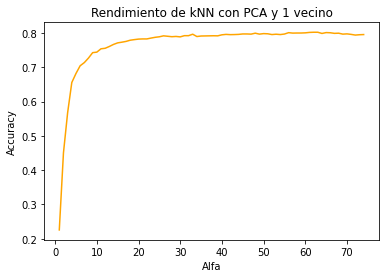

In [38]:
plt.title("Rendimiento de kNN con PCA y 1 vecino")
#plt.plot(range(1, 50), accuracyAlpha50)
plt.plot(range(1, 75), accuracyAlpha75, color="orange")
plt.xlabel("Alfa")
plt.ylabel("Accuracy")
plt.show()

In [49]:
%%time
a50I = estudio_k(50, X_train, y_train)
a50 = estudio_k_PCA(50, 20, X_train, y_train)
a50bis = estudio_k_PCA(50, 50, X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

CPU times: user 3min 47s, sys: 1min 59s, total: 5min 46s
Wall time: 1min 4s


/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

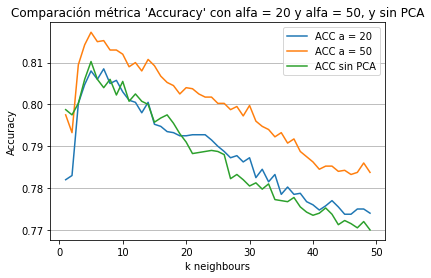

NameError: name 'pyplot' is not defined

In [50]:
%%time
rango = range(1, 50)
plt.plot(rango, a50, label='ACC a = 20')

plt.plot(rango, a50bis, label='ACC a = 50')

plt.plot(rango, a50I, label='ACC sin PCA')

plt.legend(loc='best')
plt.title("Comparación métrica 'Accuracy' con alfa = 20 y alfa = 50, y sin PCA")
plt.grid(axis='y')
plt.xlabel("k neighbours")
plt.ylabel("Accuracy")
plt.show()

# show the plot
pyplot.show()

## Elijo mejores resultados de accuracy para kNN solo, PCA, t-SNE y UMAP para varias muestras y checkeo su tiempo de ejecucion

### Estudio muestras

In [94]:
# No se por que el kernel se muere cuando hago esta funcion
def muestra(cant):
    df_train_custom = df_train_total.sample(cant)
    X_custom = df_train_custom[df_train_custom.columns[1:]].values
    y_custom = df_train_custom["label"].values
    
    return df_train_custom, X_custom, y_custom

M = 1000

In [98]:
%%time

df_train_1000, X_1000, y_1000 = muestra(1000)
accuracyI = estudio_k_PCA(50, 20, X_1000, y_1000)

CPU times: user 9.62 s, sys: 5.33 s, total: 14.9 s
Wall time: 2.61 s


M = 2500

In [101]:
%%time

df_train_2500, X_2500, y_2500 = muestra(2500)
accuracyII = estudio_k_PCA(50, 20, X_2500, y_2500)

CPU times: user 27.4 s, sys: 16.5 s, total: 43.8 s
Wall time: 7.53 s


M = 5000

In [102]:
%%time

df_train_5000, X_5000, y_5000 = muestra(5000)
accuracyIII = estudio_k_PCA(50, 20, X_5000, y_5000)

CPU times: user 1min 19s, sys: 44.9 s, total: 2min 4s
Wall time: 22.5 s


M = 10000

In [ ]:
%%time

df_train_10000, X_10000, y_10000 = muestra(10000)
accuracyIV = estudio_k_PCA(50, 20, X_10000, y_10000)

CPU times: user 3min 36s, sys: 2min 54s, total: 6min 30s
Wall time: 1min 21s


#### Grafico todos los tipos de muestra para ver en que se diferencia su performance 

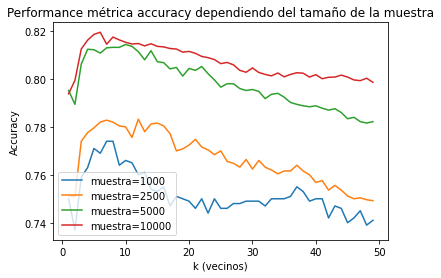

<Figure size 432x288 with 0 Axes>

In [ ]:
rangoMuestra = range(1, 50)
plt.plot(rangoMuestra, accuracyI, label='muestra=1000')
plt.plot(rangoMuestra, accuracyII, label='muestra=2500')
plt.plot(rangoMuestra, accuracyIII, label='muestra=5000')
plt.plot(rangoMuestra, accuracyIV, label='muestra=10000')
plt.xlabel("k (vecinos)")
plt.ylabel("Accuracy")
#plt.xticks(rangoMuestra)
plt.title("Performance métrica accuracy dependiendo del tamaño de la muestra")
leg = plt.legend(loc='lower left')
plt.show()
plt.savefig("Imagenes/muestra.png")

### Best kNN solo

### Best kNN con PCA

### Best kNN con t-SNE

### Best kNN con UMAP